# FORECASTING
## SCRAPING PANEL DATA
Start by defining the current date in the format required by websites for scraping:

In [ ]:
from datetime import datetime, timedelta
 
current_date = datetime.now()
current_quarter = round((current_date.month - 1) // 3 + 1)
print(current_quarter)
true_quarter=(current_quarter)
if true_quarter>1:
        this_date = datetime(current_date.year, true_quarter, 1)
        this_date1 = datetime(current_date.year, current_quarter, 1)
else:
        this_date = datetime(current_date.year-1, true_quarter+8, 1)
        this_date1 = datetime(current_date.year-1, current_quarter+2, 1) 
        start_date=datetime(2000,7,1)
        end_date=this_date
        num_months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
        num_quarters=(num_months+1)/3
num_quarters=int(num_quarters)
quarter = this_date.strftime("%Y%m")
quarter1 = this_date1.strftime('%Y%-m')
quarter2 = this_date1.strftime('%Y-Q%-m')
quarter3 = this_date1.strftime('%YQ%-m')
quarter4= this_date.strftime("%Y-%m")
print(quarter1)
print(quarter2)
print(quarter)
print(quarter4)


##### Import all the Libraries

In [16]:
import requests, json
import pandas as pd
import numpy as np
import time
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

##### Define functions

In [17]:
def print_dictionary(**kwargs):
    for key, value in kwargs.items():
         key_value = "{0} : {1}".format(key, value)
    return key_value
    #print(key_value)

def heads(name,name1):
    title="_".join([name, name1])
    return title

def annual(values):
    values_a=[]
    delka=round((len(values)-2)/3)
    for i in range(0,delka):
        values_m=sum(values[i*3:i*3+3])/3
        values_a.append(values_m)
    return values_a

def key_word(country,codes,name,frequency):
    title=".".join([country, codes, name, frequency])
    title=str(title)
    return title

Now, scrape data for the Czech variables PMI manufacturing, Interest rate 3-month PRIBOR, Nominal wage and Czech GDP: 

Scrape data for the Eurozone GDP:

In [ ]:
#get data for all the EA19 countries and CZ

#B1GQ #gdp
#P31_S14_S15 #consumption of HHS and NPISH
#PS_S13 #consumption of government
#P51G #gross fixed capital formation
#P5G #gross capital formation
#P6 #exports
#P7 #imports
#D1 #compensation of employees

head=["GDP","CONS_HHS", "CONS_GOV", "THFK", "THK", "EXPORT", "IMPORT"]
head1={"GDP","CONS_HHS", "CONS_GOV", "THFK", "THK", "EXPORT", "IMPORT"}
countries=["EA19","CZ","BE","DE", "IE", "ES", "FR", "IT","CY","EL", "SI", "LU", "NL","AT", "PT", "FI", "MT","SK", "EE", "LV", "LT"]
table=[]
values=np.array([])
queries=["B1GQ", "P31_S14_S15", "P3_S13", "P51G", "P5G", "P6", "P7"]
total_head=np.array([])
#{quarter2}
for country in countries:
    if countries.index(country) >1:
        dframe = pd.DataFrame(table,total_head)
        dframe=dframe.T
        dframe=dframe.dropna()
        print(dframe)
    if countries.index(country)%2 ==0 & countries.index(country)>1: 
        print(countries.index(country)%2)
        print(countries.index(country))
        time.sleep(60)
    if countries.index(country) >8:
        time.sleep(120)
    for query in queries:
        url = f'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/NAMQ_10_GDP/Q.CP_MEUR.SCA.{query}.{country}?startperiod=2000-Q3&endperiod={quarter2}&format=JSON&lang=en'
        #wait for 3 second
        response = requests.get(url)
        data = json.loads(response.text)
        multiple_level_data = pd.json_normalize(data['value'])
        df = pd.DataFrame.from_dict(multiple_level_data)
        dff=df.T
        
        dff=dff.reset_index()
        variable=dff[0]
        variable=variable[(len(variable)-num_quarters):len(variable)]
        variable=variable.reset_index(drop=True)
        indexes = queries.index(query)
        code=countries.index(country)
        values=np.append(values,code)
        total_name=heads(countries[code],head[indexes])
        total_head=np.append(total_head,total_name)
        a_dictionary={head[indexes] : variable}
        dic=print_dictionary(**a_dictionary)
        table.append(a_dictionary[head[indexes]])
dframe = pd.DataFrame(table,total_head)
dframe=dframe.T
print(dframe)


National Accounts Panel

In [ ]:
dframe=pd.read_csv('National_accounts_Eurostat.csv')
full_series=[]
line_new=[]
dframe_new=[]
head=["GDP","CONS_HHS", "CONS_GOV", "THFK", "THK", "EXPORT", "IMPORT"]
head1={"GDP","CONS_HHS", "CONS_GOV", "THFK", "THK", "EXPORT", "IMPORT"}
countries=["CZ","BE","DE", "IE", "ES", "FR", "IT","CY","EL", "SI", "LU", "NL","AT", "PT", "FI", "MT","SK", "EE", "LV", "LT"]
for query in head:
    indexes = head.index(query)
    if indexes>0:
        a_dictionary={head[indexes-1] : line_new}
        dic=print_dictionary(**a_dictionary)
        dframe_new.append(a_dictionary[head[indexes-1]])
        line_new=[]
    for country in countries:
        indexes = head.index(query)
        code=countries.index(country)
        full_series1=heads(countries[code],head[indexes])
        full_series=np.append(full_series,full_series1)
        line=dframe[full_series1]
        line_new=np.append(line_new,line,0)
    if indexes==6:
        a_dictionary={head[indexes-1] : line_new}
        dic=print_dictionary(**a_dictionary)
        dframe_new.append(a_dictionary[head[indexes-1]])
        line_new=[]
        
dframe_newest=[]
dframe_newest = pd.DataFrame(dframe_new,["GDP","CONS_HHS", "CONS_GOV", "THFK", "THK", "EXPORT", "IMPORT"]) #,full_series)
dframe_newest=dframe_newest.T
dframe_newest=dframe_newest
val=list(range(0,len(dframe_newest)))
dframe_newest['values']=val
GDP_EA=[]
length=int(len(dframe_newest)/len(dframe["CZ_GDP"]))
for i in range(0, length):
    GDP_EAA=dframe["EA19_GDP"]
    GDP_EA=np.append(GDP_EA,GDP_EAA,0)
dframe_newest['GDP_EA']=GDP_EA
print(dframe_newest.tail(5))



          GDP  CONS_HHS  CONS_GOV    THFK     THK   EXPORT   IMPORT  values  \
1695  12685.0    7516.6    2308.0  2604.7  1470.3   9389.0   8248.3    1695   
1696  12931.0    7484.9    2439.0  2853.4  1571.3   9811.4   8621.8    1696   
1697  13382.0    7597.0    2348.7  2828.6  2019.7   9998.4   9032.8    1697   
1698  13948.9    7718.9    2462.8  2978.5  2416.8  10312.8   9529.2    1698   
1699  14553.8    8191.6    2537.7  2923.5  2950.8  11023.0  10754.1    1699   

         GDP_EA  
1695  2916162.5  
1696  2927320.9  
1697  2940044.8  
1698  3010914.2  
1699  3113705.2  


#### Wages

In [ ]:
#Get data for all the EA19 countries and CZ, missing DE and FR - fill in EA19

#D11 #Wages
head=["WAGE"]
head1={"WAGE"}
countries=["EA19","CZ","BE", "IE", "ES", "IT","CY","EL", "SI", "LU", "NL","AT", "PT", "FI", "MT","SK", "EE", "LV", "LT"]#,"DE", "FR"]
table=[]
values=np.array([])
queries=["D11"]
total_head=np.array([])
#{quarter2}
for country in countries:
    if countries.index(country) >1:
        dframe = pd.DataFrame(table,total_head)
        dframe=dframe.T
        dframe=dframe.dropna()
        print(dframe)
    if countries.index(country)%2 ==0 & countries.index(country)>1: 
        print(countries.index(country)%2)
        print(countries.index(country))
    for query in queries:
        url = f'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/NAMQ_10_GDP/Q.CP_MEUR.SCA.{query}.{country}?startperiod=2000-Q3&endperiod={quarter2}&format=JSON&lang=en'
        response = requests.get(url)
        data = json.loads(response.text)
        multiple_level_data = pd.json_normalize(data['value'])
        df = pd.DataFrame.from_dict(multiple_level_data)
        dff=df.T
        dff=dff.reset_index()
        variable=dff[0]
        variable=variable[len(variable)-85:len(variable)]
        variable=variable.reset_index(drop=True)
        indexes = queries.index(query)
        code=countries.index(country)
        values=np.append(values,code)
        total_name=heads(countries[code],head[indexes])
        total_head=np.append(total_head,total_name)
        a_dictionary={head[indexes] : variable}
        dic=print_dictionary(**a_dictionary)
        table.append(a_dictionary[head[indexes]])
dframe_w = pd.DataFrame(table,total_head)
dframe_w=dframe_w.T
dframe_w=dframe_w.dropna()
dframe_w['DE_WAGE']=dframe_w['EA19_WAGE']
dframe_w['FR_WAGE']=dframe_w['EA19_WAGE']
print(dframe_w)
#dframe_w.to_csv('Wages_Eurostat.csv', index=False)

    EA19_WAGE  CZ_WAGE
0    654147.1   5047.3
1    661785.0   5259.9
2    669983.7   5400.6
3    675206.6   5587.8
4    681829.6   5724.6
..        ...      ...
80  1113172.3  19142.6
81  1122985.2  19255.7
82  1123792.6  19003.6
83  1137523.0  20870.3
84  1176170.4  21381.7

[85 rows x 2 columns]
    EA19_WAGE  CZ_WAGE  BE_WAGE
0    654147.1   5047.3  23866.0
1    661785.0   5259.9  24300.0
2    669983.7   5400.6  24554.0
3    675206.6   5587.8  24863.0
4    681829.6   5724.6  25324.0
..        ...      ...      ...
80  1113172.3  19142.6  43561.0
81  1122985.2  19255.7  43848.0
82  1123792.6  19003.6  43501.0
83  1137523.0  20870.3  44878.0
84  1176170.4  21381.7  45844.0

[85 rows x 3 columns]
    EA19_WAGE  CZ_WAGE  BE_WAGE  IE_WAGE
0    654147.1   5047.3  23866.0   9090.0
1    661785.0   5259.9  24300.0   9497.0
2    669983.7   5400.6  24554.0   9565.1
3    675206.6   5587.8  24863.0   9821.2
4    681829.6   5724.6  25324.0  10158.2
..        ...      ...      ...      ...
80  111

#### Wage Panel appended to the Main Dataset

In [ ]:
dframe_w=pd.read_csv('Wages_Eurostat.csv')
full_series=[]
line_new=[]
dframe_new=[]
head=["WAGE"]
head1={"WAGE"}
countries=["CZ","BE", "DE", "IE", "ES", "FR", "IT","CY","EL", "SI", "LU", "NL","AT", "PT", "FI", "MT","SK", "EE", "LV", "LT"] #"EA19"

for query in head:
    indexes = head.index(query)
    if indexes>0:
        a_dictionary={head[indexes-1] : line_new}
        dic=print_dictionary(**a_dictionary)
        dframe_new.append(a_dictionary[head[indexes-1]])
        line_new=[]
    for country in countries:
        indexes = head.index(query)
        code=countries.index(country)
        full_series1=heads(countries[code],head[indexes])
        full_series=np.append(full_series,dframe_w[full_series1])
        line=dframe_w[full_series1]
        line_new=np.append(line_new,line,0)
    if code==len(countries)-1:
        a_dictionary={head[indexes-1] : line_new}
        dic=print_dictionary(**a_dictionary)
        dframe_new.append(a_dictionary[head[indexes-1]])
        line_new=[]
dframe_newest_w = pd.DataFrame(dframe_new,["WAGE"]) #,full_series)
dframe_newest_w=dframe_newest_w.T
val=list(range(0,len(dframe_newest_w)))
dframe_newest_w['values']=val

#create EA wage variable
WAGE_EA=[]
length=int(len(dframe_newest_w)/len(dframe_w["CZ_WAGE"]))
for i in range(0, length):
    WAGE_EAA=dframe_w["EA19_WAGE"]
    WAGE_EA=np.append(WAGE_EA,WAGE_EAA,0)
dframe_newest_w['W_EA']=WAGE_EA
dframe_total=pd.merge(dframe_newest,dframe_newest_w,on="values")

print(dframe_total.head(5))



       GDP  CONS_HHS  CONS_GOV    THFK     THK  EXPORT  IMPORT  values  \
0  17043.6    8599.0    3318.5  5291.5  5423.8  8298.1  8595.7       0   
1  17517.6    8746.2    3402.2  5623.5  5728.8  8889.8  9249.5       1   
2  18026.5    8956.3    3461.7  5804.1  6160.6  8967.7  9519.8       2   
3  18582.9    9284.1    3623.9  5793.0  5999.6  9101.7  9426.4       3   
4  19192.1    9559.9    3751.7  5910.1  5912.7  9438.9  9471.2       4   

      GDP_EA    WAGE      W_EA  
0  1765469.7  5047.3  654147.1  
1  1786075.6  5259.9  661785.0  
2  1818396.2  5400.6  669983.7  
3  1829889.9  5587.8  675206.6  
4  1845091.6  5724.6  681829.6  


#### Interest rate

In [ ]:
head_IR=["interest_rate"]
countries_IR=["EA","CZ"]
table_IR=[]
values_IR=[]
total_head_IR=np.array([])
for country in countries_IR:
    indexes=countries_IR.index(country)
    if indexes==0:
        url=f'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/IRT_ST_Q/Q.IRT_M3.{country}?startperiod=2000-Q3&endperiod={quarter2}&format=JSON&lang=en'
    if indexes==1:
        url=f'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/IRT_ST_M/M.IRT_M3.CZ?startperiod=2000-M9&endperiod=2021-M9&format=JSON&lang=en'
    response = requests.get(url)
    data = json.loads(response.text)
    multiple_level_data = pd.json_normalize(data['value'])
    df = pd.DataFrame.from_dict(multiple_level_data)
    dff=df.T
    dff=dff.reset_index()
    variable=dff[0]
    if indexes==0:
        variable=variable[42:]
        variable=variable.reset_index(drop=True)
        
    if indexes==1:
        variable_m=variable[92:]
        variable_m=variable_m.reset_index(drop=True)
        variable=annual(variable_m)
        variable=np.array(variable)
    a_dictionary={countries_IR[indexes] : variable}
    dic=print_dictionary(**a_dictionary)
    values_IR.append(a_dictionary[countries_IR[indexes]])
    total_name_IR=heads(countries_IR[indexes],head_IR[0])
    total_head_IR=np.append(total_head_IR,total_name_IR)
dframe_IR=pd.DataFrame(values_IR,total_head_IR)
dframe_IR=dframe_IR.T
dframe_IR=dframe_IR.dropna()
print(dframe_IR)
IR_CZ=dframe_IR['CZ_interest_rate']
IR_EA=dframe_IR['EA_interest_rate']


    EA_interest_rate  CZ_interest_rate
0             4.7388          5.380000
1             5.0282          5.343333
2             4.7447          5.030000
3             4.5885          5.303333
4             4.2779          5.260000
..               ...               ...
80           -0.4712          0.346667
81           -0.5227          0.356667
82           -0.5423          0.360000
83           -0.5405          0.703333
84           -0.5458          2.033333

[85 rows x 2 columns]


#### IR Panel appended to Main dataset

In [ ]:
def print_dictionary(**kwargs):
    for key, value in kwargs.items():
         key_value = "{0} : {1}".format(key, value)
    return key_value
    #print(key_value)

def heads(name,name1):
    title="_".join([name, name1])
    return title
full_series=[]
line_new=[]
dframe_new=[]
head=["IR"]
head1={"IR"}
countries=["EA"]
line_new_cz=IR_CZ
for query in range(1,20):
    line_new_cz=np.append(line_new_cz,IR_EA,0)     
dframe_total['IR']=line_new_cz
dframe_total=dframe_total.loc[:,dframe_total.columns!='IR_EA']
dframe_total=dframe_total.loc[:,dframe_total.columns!='IR_CZ']
print(dframe_total.head(5))



       GDP  CONS_HHS  CONS_GOV    THFK     THK  EXPORT  IMPORT  values  \
0  17043.6    8599.0    3318.5  5291.5  5423.8  8298.1  8595.7       0   
1  17517.6    8746.2    3402.2  5623.5  5728.8  8889.8  9249.5       1   
2  18026.5    8956.3    3461.7  5804.1  6160.6  8967.7  9519.8       2   
3  18582.9    9284.1    3623.9  5793.0  5999.6  9101.7  9426.4       3   
4  19192.1    9559.9    3751.7  5910.1  5912.7  9438.9  9471.2       4   

      GDP_EA    WAGE      W_EA   IR_EA     IR_CZ        IR  
0  1765469.7  5047.3  654147.1  4.7388  5.380000  5.380000  
1  1786075.6  5259.9  661785.0  5.0282  5.343333  5.343333  
2  1818396.2  5400.6  669983.7  4.7447  5.030000  5.030000  
3  1829889.9  5587.8  675206.6  4.5885  5.303333  5.303333  
4  1845091.6  5724.6  681829.6  4.2779  5.260000  5.260000  


#### Eurostat Sentiment Indicators


In [ ]:
import requests, json
def print_dictionary(**kwargs):
    for key, value in kwargs.items():
         key_value = "{0} : {1}".format(key, value)
    return key_value

def heads(name,name1):
    title="_".join([name, name1])
    return title

head=["const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"]
head1={"const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"}
countries=["EA19","CZ","BE","DE", "IE", "ES", "FR", "IT","CY","EL", "SI", "NL","AT", "PT", "FI", "SK", "EE"] #Missing countries LU LT LV MT
table=[]
dframe_sen1=[]
values=np.array([])
queries=["BS-CCI-BAL","BS-CSMCI-BAL","BS-ICI-BAL","BS-RCI-BAL","BS-SCI-BAL"]
total_head=np.array([])
for country in countries:
    if countries.index(country) >1:
        dframe_sen1 = pd.DataFrame(table,total_head)
        dframe_sen1=dframe_sen1.T
        dframe_sen1=dframe_sen1.dropna()
    if countries.index(country)%2 ==0 & countries.index(country)>1: 
        time.sleep(30)
    if countries.index(country) >8:
        time.sleep(30)
    for query in queries:
        url = f'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/EI_BSSI_M_R2/M.{query}.SA.{country}?startperiod=2000-01&endperiod={quarter4}&format=JSON&lang=en'
    
        response = requests.get(url)
        data = json.loads(response.text)
        multiple_level_data = pd.json_normalize(data['value'])
        df = pd.DataFrame.from_dict(multiple_level_data)
        dff=df.T
        variable=dff[0]
        variable=variable[len(variable)-259:len(variable)-4]
        variable=variable.reset_index(drop=True)
        var_ind=variable.index
        indexes = queries.index(query)
        code=countries.index(country)
        values=np.append(values,code)
        total_name=heads(countries[code],head[indexes])
        total_head=np.append(total_head,total_name)
        a_dictionary={head[indexes] : variable}
        dic=print_dictionary(**a_dictionary)
        table.append(a_dictionary[head[indexes]])
dframe_sen1 = pd.DataFrame(table,total_head)
dframe_sen1=dframe_sen1.reset_index(drop=True)
dframe_sen1=dframe_sen1.T

print(dframe_sen1)

#df=dframe_sen1
#df=df.interpolate(method='linear', limit_direction='forward')
#df=df.interpolate(method='linear', limit_direction='backward',limit=1)
#df.to_csv('Eurostat_sensitivity.csv', index=False)


      0    1     2    3     4     5     6     7     8     9   ...    75    76  \
0    1.3 -2.3   6.2 -5.6  32.5 -27.1 -20.0  22.4  15.5  -6.3  ... -57.4 -28.2   
1   -2.1 -2.2   6.7 -2.9  31.8 -30.4 -17.2  14.6  12.6 -13.3  ... -48.3 -24.7   
2   -0.6 -4.8   6.7 -7.1  29.0 -27.6 -16.9  16.8   6.3  -3.5  ... -39.9 -27.9   
3   -0.9 -4.4   6.2 -6.6  30.7 -28.2 -15.7  18.7  12.0   2.6  ... -38.0 -25.9   
4   -2.8 -3.7   5.9 -6.1  24.5 -17.3 -15.3  13.7  16.2   0.7  ... -37.6 -26.9   
..   ...  ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
250  4.9 -5.1  11.6  0.5  11.4  -4.0  -6.5   5.3  16.7   NaN  ... -20.3 -18.2   
251  5.2 -3.3  12.9  4.7  17.9  -5.3  -4.9  10.7  21.1   NaN  ... -18.5 -17.1   
252  4.0 -4.4  14.7  4.4  18.9  -4.8  -7.0   0.0  20.7   NaN  ... -21.4 -17.7   
253  5.5 -5.3  13.9  4.6  16.8  -4.1  -4.3  -2.2  21.3   NaN  ... -21.1 -17.4   
254  7.5 -4.0  14.2  1.4  15.1  -4.2  -6.3  -9.7  22.4   NaN  ... -13.7 -19.0   

       77    78    79    80

#### Sensitivity - dataset manipulations

In [ ]:
df=dframe_sen1
df=df.interpolate(method='linear', limit_direction='forward')
df=df.interpolate(method='linear', limit_direction='backward',limit=1)
print(df)
df.to_csv('Eurostat_sensitivity.csv', index=False)

import pandas as pd

def heads(name,name1):
    title="_".join([name, name1])
    return title

dframe_sen=pd.read_csv('Eurostat_sensitivity.csv',header=[0])
indicators=["const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"]
countries=["EA19","CZ","BE","DE", "IE", "ES", "FR", "IT","CY","EL", "SI", "NL","AT", "PT", "FI", "SK", "EE"]
label_total=[]
label=[]
dframe_sensitivity=[]
for query in indicators:
    for country in countries:
        label=heads(country,query)
        label_total.append(label)
print(len(label_total))
dframe_sen=pd.DataFrame(dframe_sen)
dframe_sen.columns=label_total

dframe_sen.to_csv('Eurostat_sensitivity_total.csv')
val=list(range(0,len(dframe_sen)))
dframe_sen['values']=val

      0    1     2    3     4     5     6     7     8     9   ...    75    76  \
0    1.3 -2.3   6.2 -5.6  32.5 -27.1 -20.0  22.4  15.5  -6.3  ... -57.4 -28.2   
1   -2.1 -2.2   6.7 -2.9  31.8 -30.4 -17.2  14.6  12.6 -13.3  ... -48.3 -24.7   
2   -0.6 -4.8   6.7 -7.1  29.0 -27.6 -16.9  16.8   6.3  -3.5  ... -39.9 -27.9   
3   -0.9 -4.4   6.2 -6.6  30.7 -28.2 -15.7  18.7  12.0   2.6  ... -38.0 -25.9   
4   -2.8 -3.7   5.9 -6.1  24.5 -17.3 -15.3  13.7  16.2   0.7  ... -37.6 -26.9   
..   ...  ...   ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   
250  4.9 -5.1  11.6  0.5  11.4  -4.0  -6.5   5.3  16.7  25.6  ... -20.3 -18.2   
251  5.2 -3.3  12.9  4.7  17.9  -5.3  -4.9  10.7  21.1  25.6  ... -18.5 -17.1   
252  4.0 -4.4  14.7  4.4  18.9  -4.8  -7.0   0.0  20.7  25.6  ... -21.4 -17.7   
253  5.5 -5.3  13.9  4.6  16.8  -4.1  -4.3  -2.2  21.3  25.6  ... -21.1 -17.4   
254  7.5 -4.0  14.2  1.4  15.1  -4.2  -6.3  -9.7  22.4  25.6  ... -13.7 -19.0   

       77    78    79    80

#### Calculate Total Sentiment Index

In [ ]:
dframe_sen=pd.read_csv('Eurostat_sensitivity_total.csv')

w=[0.05,0.2,0.4,0.05,0.3]
indicators=["const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"]
countries=["EA19","CZ","BE","DE", "IE", "ES", "FR", "IT","CY","EL", "SI", "NL","AT", "PT", "FI", "SK", "EE"]
table=[]
table_total=[]
label_matrix=[]
title_tot=[]
def heads(name,name1):
    title="_".join([name, name1])
    return title
for country in countries:
    country_index=(countries.index(country))

    for i in indicators:
        indexes = indicators.index(i)
        title=heads(country,i)
        title_tot.append(title)
        table.append(dframe_sen[title])
    label='TOTAL_SENTIMENT'
    label_total=heads(country,label)
    table_country=pd.DataFrame(table)
    table_country=table_country.T
    label_matrix.append(label_total)
    total=(0.05*table_country[title_tot[(country_index)]]+0.2*table_country[title_tot[(country_index+1)]]+0.4*table_country[title_tot[(country_index+2)]]+0.05*table_country[title_tot[(country_index+3)]]+0.3*table_country[title_tot[(country_index+4)]])
    table_total.append(total)
TOTAL_SEN=pd.DataFrame(table_total,label_matrix)
TOTAL_SEN=TOTAL_SEN.T
val=list(range(0,len(dframe_sen)))
TOTAL_SEN['values']=val
dframe_sen_total=pd.merge(TOTAL_SEN,dframe_sen,on="values")
print(dframe_sen_total)
dframe_sen_total.to_csv('Eurostat_sen_total.csv', index=False)
    

     EA19_TOTAL_SENTIMENT  CZ_TOTAL_SENTIMENT  BE_TOTAL_SENTIMENT  \
0                   4.740              -4.850              -6.205   
1                   5.515              -4.780              -5.720   
2                   6.040              -6.065              -7.410   
3                   4.955              -5.550              -8.855   
4                   2.605              -5.020              -9.560   
..                    ...                 ...                 ...   
250                 5.195              -6.685              -5.390   
251                 8.335              -5.240              -1.960   
252                 7.915              -5.595              -3.295   
253                 7.110              -7.330              -3.825   
254                 7.060              -7.035              -3.005   

     DE_TOTAL_SENTIMENT  IE_TOTAL_SENTIMENT  ES_TOTAL_SENTIMENT  \
0                -3.970              -4.690              -2.470   
1                -3.550              

#### Sentiment Indices - aggregate from Monthly to Quarterly

In [ ]:
def annual(values):
    values_a=[]
    delka=round((len(values)-1)/3)
    for i in range(0,delka):
        values_m=sum(values[i*3:i*3+3])/3
        values_a.append(values_m)
    return values_a

dframe_sen_total=pd.read_csv('Eurostat_sen_total.csv')

indicators=["const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"]
countries=["EA19","CZ","BE","DE", "IE", "ES", "FR", "IT","CY","EL", "SI", "NL","AT", "PT", "FI", "SK", "EE"]
countries_fill=["LU","MT","LV", "LT"]
label_total=[]
label_missing=[]
value_missing=[]
label=[]
dframe_sensitivity=[]
dframe_sen_annual=[]
for query in indicators:
    for country in countries:
        label=heads(country,query)
        label_total.append(label)       

for name in label_total:
    variable_m=dframe_sen_total[name]
    variable=annual(variable_m)
    dframe_sensitivity.append(variable)

dframe_sen_annual=pd.DataFrame(dframe_sensitivity,label_total)
dframe_sen_annual=dframe_sen_annual.T

for query in indicators:
    for country in countries_fill:
        label=heads(country,query)
        label1=heads("EA19",query)
        label_missing.append(label)
        value_missing.append(dframe_sen_annual[label1])
dframe_sen_filled=pd.DataFrame(value_missing,label_missing)
dframe_sen_filled=dframe_sen_filled.T

val=list(range(0,len(dframe_sen_annual)))
dframe_sen_annual['values']=val
dframe_sen_filled['values']=val
dframe_sen_total=pd.merge(dframe_sen_annual,dframe_sen_filled,on="values")
dframe_newest=pd.merge(dframe_newest,dframe_sen_total,on="values")
print(dframe_sen_total)



    EA19_const_conf  CZ_const_conf  BE_const_conf  DE_const_conf  \
0         -0.466667      -3.100000       6.533333      -5.200000   
1         -0.733333      -3.733333       5.666667      -7.066667   
2         -2.933333      -3.533333       1.700000      -3.933333   
3         -5.266667      -4.666667      -4.566667      -8.600000   
4         -8.933333      -6.900000      -9.800000      -9.233333   
..              ...            ...            ...            ...   
80       -10.466667     -14.366667     -13.366667     -11.366667   
81        -8.166667     -15.633333      -8.600000     -10.933333   
82        -5.666667     -13.766667      -2.433333     -16.600000   
83         4.366667      -5.500000      11.833333       0.733333   
84         5.666667      -4.566667      14.266667       3.466667   

    IE_const_conf  ES_const_conf  FR_const_conf  IT_const_conf  CY_const_conf  \
0       31.100000     -28.366667     -18.033333      17.933333      11.466667   
1       26.566667    

In [ ]:
dframe_sens=dframe_sen_total
full_series=[]
line_new=[]
dframe_new=[]
head=["const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"]
head1={"const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"}
head2=["CONST_INDEX","CON_INDEX", "IND_INDEX", "RETAIL_INDEX", "SERV_INDEX"]

countries=["CZ","BE", "DE", "IE", "ES", "FR", "IT","CY","EL", "SI", "LU", "NL","AT", "PT", "FI", "MT","SK", "EE", "LV", "LT"] #"EA19"

for query in head:
    indexes = head.index(query)
    for country in countries:
        indexes = head.index(query)
        code=countries.index(country)
        full_series1=heads(countries[code],head[indexes])
        full_series=np.append(full_series,dframe_sens[full_series1])
        line=dframe_sens[full_series1]
        line_new=np.append(line_new,line,0)

    if code==len(countries)-1:
        a_dictionary={head[indexes-1] : line_new}
        dic=print_dictionary(**a_dictionary)
        dframe_new.append(a_dictionary[head[indexes-1]])
        line_new=[]

dframe_newest_sen = pd.DataFrame(dframe_new,head2) #,full_series)
dframe_newest_sen=dframe_newest_sen.T
val=list(range(0,len(dframe_newest_sen)))
dframe_newest_sen['values']=val
dframe_all=pd.merge(dframe_total,dframe_newest_sen,on="values")

dframe_print=dframe_all.loc[:,dframe_all.columns!= 'values']
#dframe_print.to_csv('Database_panel.csv')
print(dframe_print.head(5))


       GDP  CONS_HHS  CONS_GOV    THFK     THK  EXPORT  IMPORT     GDP_EA  \
0  17043.6    8599.0    3318.5  5291.5  5423.8  8298.1  8595.7  1765469.7   
1  17517.6    8746.2    3402.2  5623.5  5728.8  8889.8  9249.5  1786075.6   
2  18026.5    8956.3    3461.7  5804.1  6160.6  8967.7  9519.8  1818396.2   
3  18582.9    9284.1    3623.9  5793.0  5999.6  9101.7  9426.4  1829889.9   
4  19192.1    9559.9    3751.7  5910.1  5912.7  9438.9  9471.2  1845091.6   

     WAGE      W_EA        IR  CONST_INDEX  CON_INDEX  IND_INDEX  \
0  5047.3  654147.1  5.380000    -3.100000 -17.533333  -5.200000   
1  5259.9  661785.0  5.343333    -3.733333 -19.933333  -1.866667   
2  5400.6  669983.7  5.030000    -3.533333 -19.266667  -4.366667   
3  5587.8  675206.6  5.303333    -4.666667 -22.166667  -0.466667   
4  5724.6  681829.6  5.260000    -6.900000 -26.733333  -2.700000   

   RETAIL_INDEX  SERV_INDEX  
0      7.300000    7.666667  
1      4.866667    5.666667  
2      5.933333    9.366667  
3     -1

For the VAR models, scrape OECD data for the variables: Eurozone interest rate, Eurozne HICP, Czech HIC and Czech Employment: 

In [ ]:
import numpy as np
import requests, json
import pandas as pd
import numpy as np
import time

from pandasdmx import Request
oecd = Request('OECD')
values=[]
total_head=[]
table=[]
countries=["EA19", "CZE", "BEL", "DEU", "IRL", "ESP", "FRA", "ITA", "GRC", "SVN", "LUX", "NLD", "AUT", "PRT", "FIN", "SVK", "EST", "LVA", "LTU"] #NO CY MT "EA19"
queries=["L","CPI"]
for country in countries:  
    code=countries.index(country)
    if countries.index(country) >1:
        dframe_oecd = pd.DataFrame(table,total_head)
        dframe_oecd=dframe_oecd.T
        dframe_oecd=dframe_oecd.dropna()  
    for query in queries:
        indexes = queries.index(query)
        if indexes==0 & code > 0:
            try: #EMPLOYMENT
                keys=key_word(countries[code],"ETONC","PERSA","Q")
                data_response = oecd.data(resource_id='QNA', key=keys, params={'startPeriod': '2000Q3', 'endPeriod':{quarter3}})

            except UnicodeDecodeError:
                pass
            except KeyError:
                pass
            else:
                oecd_data = data_response.data

                df = data_response.write(oecd_data.series, parse_time='True')
                df = data_response.write().unstack().reset_index()
                df_L=pd.DataFrame(df)
                df_L = df_L.sort_values(["TIME_PERIOD"], ascending = (True))
                variable=df_L.iloc[:,5].values
                time=df_L.iloc[:,4].values
        if indexes==1:

            try: #CPI
                keys=key_word(countries[code],"CPHPTT01","IXOB","M") 
                data_response = oecd.data(resource_id='PRICES_CPI', key=keys, params={'startPeriod': '2000-07', 'endPeriod':{quarter4}})

            except UnicodeDecodeError:
                pass
            except KeyError:
                pass
            else:
                oecd_data = data_response.data

                df = data_response.write(oecd_data.series, parse_time='True')
                df = data_response.write().unstack().reset_index()
                df_var=pd.DataFrame(df)
                df_var = df_var.sort_values(["TIME_PERIOD"], ascending = (True))
                var_m=df_var.iloc[:,5].values
                gg=len(var_m)
                var=[0]*gg
                for m in range(0,(len(var)-1)):
                    var[m]=sum(var_m[(3*m):(2+3*m)])/3
                variable=var[0:len(df_L.iloc[:,5].values)]
        indexes = queries.index(query)
        code=countries.index(country)
        values=np.append(values,code)
        total_name=heads(countries[code],queries[indexes])
        total_head=np.append(total_head,total_name)
        a_dictionary={queries[indexes] : variable}
        dic=print_dictionary(**a_dictionary)
        table.append(a_dictionary[queries[indexes]])

EA_CPI=[]
df_oecd=pd.DataFrame(data=table)
dframe_oecd = pd.DataFrame(table,total_head)
dframe_oecd=dframe_oecd.T
EA_CPI=[]
for country in countries:
    code=countries.index(country)
    if code>0:
        name=heads(country,"L")
        EA_CPI=sum(EA_CPI,dframe_oecd[name]) 
dframe_oecd['EA_CPI']=EA_CPI

In [ ]:
dframe_oecd['EA19_CPI']=dframe_oecd['EA_CPI']
dframe_oecd1=dframe_oecd

full_series=[]
line_new=[]
dframe_new=[]
line=[]
head=["const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"]
head1={"const_conf", "consumer_conf", "indust_conf", "retail_conf", "serv_conf"}
head2=["CONST_INDEX","CON_INDEX", "IND_INDEX", "RETAIL_INDEX", "SERV_INDEX"]

#Missing countries CY MT replaced by EA19
countries1=["CZE","BEL", "DEU", "IRL", "ESP", "FRA", "ITA", "EA19", "GRC", "SVN", "LUX", "NLD", "AUT", "PRT", "FIN", "EA19","SVK", "EST", "LVA", "LTU"] 
head=["L","CPI"]

for query in head:
    indexes = head.index(query)
    for country in countries1:
        indexes = head.index(query)
        code=countries1.index(country)
        full_series1=heads(countries1[code],head[indexes])
        full_series=np.append(full_series,dframe_oecd1[full_series1]) 
        line=dframe_oecd1[full_series1]
        line_new=np.append(line_new,line,0)

    if code==len(countries1)-1:
        a_dictionary={head[indexes-1] : line_new}
        dic=print_dictionary(**a_dictionary)
        dframe_new.append(a_dictionary[head[indexes-1]])
        line_new=[]

dframe_new_oecd = pd.DataFrame(dframe_new,head)
dframe_new_oecd=dframe_new_oecd.T
val=list(range(0,len(dframe_new_oecd)))
dframe_new_oecd['values']=val
dframe_var=pd.merge(dframe_all,dframe_new_oecd,on="values")

print(dframe_var.head(5))
dframe_var.to_csv('Database_panel_var.csv')


       GDP  CONS_HHS  CONS_GOV    THFK     THK  EXPORT  IMPORT  values  \
0  17043.6    8599.0    3318.5  5291.5  5423.8  8298.1  8595.7       0   
1  17517.6    8746.2    3402.2  5623.5  5728.8  8889.8  9249.5       1   
2  18026.5    8956.3    3461.7  5804.1  6160.6  8967.7  9519.8       2   
3  18582.9    9284.1    3623.9  5793.0  5999.6  9101.7  9426.4       3   
4  19192.1    9559.9    3751.7  5910.1  5912.7  9438.9  9471.2       4   

      GDP_EA    WAGE      W_EA        IR  CONST_INDEX  CON_INDEX  IND_INDEX  \
0  1765469.7  5047.3  654147.1  5.380000    -3.100000 -17.533333  -5.200000   
1  1786075.6  5259.9  661785.0  5.343333    -3.733333 -19.933333  -1.866667   
2  1818396.2  5400.6  669983.7  5.030000    -3.533333 -19.266667  -4.366667   
3  1829889.9  5587.8  675206.6  5.303333    -4.666667 -22.166667  -0.466667   
4  1845091.6  5724.6  681829.6  5.260000    -6.900000 -26.733333  -2.700000   

   RETAIL_INDEX  SERV_INDEX          L        CPI  
0      7.300000    7.666667 

In [ ]:
countries=["CZK","USD"]
table=[]
values=np.array([])
total_head=np.array([])
for country in countries:
    if countries.index(country) >1:
        dframe = pd.DataFrame(table,total_head)
        dframe=dframe.T
        dframe=dframe.dropna()

    url = f'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/ERT_BIL_EUR_Q/Q.AVG.NAC.{country}?startperiod=2000-09&endperiod={quarter2}&format=JSON&lang=en'
    response = requests.get(url)
    data = json.loads(response.text)
    multiple_level_data = pd.json_normalize(data['value'])
    df = pd.DataFrame.from_dict(multiple_level_data)
    dff=df.T
    dff=dff.reset_index()
    variable=dff[0]
    variable=variable[len(variable)-86:len(variable)-1]
    variable=variable.reset_index(drop=True)
    code=countries.index(country)
    values=np.append(values,code)
    total_name=countries
    total_head=countries
    a_dictionary={countries[code] : variable}
    dic=print_dictionary(**a_dictionary)
    table.append(a_dictionary[countries[code]])
dframe_NER = pd.DataFrame(table,total_head)
dframe_NER=dframe_NER.T
dframe_NER=dframe_NER.dropna()
print(dframe_NER)

label_total=[]
label=[]
dframe_sensitivity=[]
for repeat in range(1,15):
    label_total.append(dframe_NER['USD'])
label_total.append(dframe_NER['CZK'])


       CZK     USD
0   35.465  0.9052
1   34.896  0.8683
2   34.791  0.9232
3   34.288  0.8725
4   34.021  0.8903
..     ...     ...
80  26.479  1.1689
81  26.667  1.1929
82  26.070  1.2048
83  25.638  1.2058
84  25.500  1.1788

[85 rows x 2 columns]


In [ ]:
label_total=[]
label_total_ner=[]
for repeat in range(1,20):
    label_total=np.append(label_total,dframe_NER['USD'])
label_total_ner=np.append(dframe_NER['CZK'],label_total)
dframe_var['NER']=label_total_ner
print(dframe_var.head(5))
dframe_var.to_csv('GDP_VAR_abs.csv', index=False)

       GDP  CONS_HHS  CONS_GOV    THFK     THK  EXPORT  IMPORT  values  \
0  17043.6    8599.0    3318.5  5291.5  5423.8  8298.1  8595.7       0   
1  17517.6    8746.2    3402.2  5623.5  5728.8  8889.8  9249.5       1   
2  18026.5    8956.3    3461.7  5804.1  6160.6  8967.7  9519.8       2   
3  18582.9    9284.1    3623.9  5793.0  5999.6  9101.7  9426.4       3   
4  19192.1    9559.9    3751.7  5910.1  5912.7  9438.9  9471.2       4   

      GDP_EA    WAGE      W_EA        IR  CONST_INDEX  CON_INDEX  IND_INDEX  \
0  1765469.7  5047.3  654147.1  5.380000    -3.100000 -17.533333  -5.200000   
1  1786075.6  5259.9  661785.0  5.343333    -3.733333 -19.933333  -1.866667   
2  1818396.2  5400.6  669983.7  5.030000    -3.533333 -19.266667  -4.366667   
3  1829889.9  5587.8  675206.6  5.303333    -4.666667 -22.166667  -0.466667   
4  1845091.6  5724.6  681829.6  5.260000    -6.900000 -26.733333  -2.700000   

   RETAIL_INDEX  SERV_INDEX          L        CPI     NER  
0      7.300000    7

## DATASET YOY
Calculate the final dataset in year-over-year growth rates:

In [ ]:
columm_all=[]
columm=pd.date_range(start="2001-09-01",end="2021-09-01", freq='Q')
colummq=columm.strftime("%Y%m").tolist()

for i in range(0,21):
    columm_all=np.append(columm_all,colummq) 

column_names=dframe_var.columns
dYoY= [columm]
YoY1=[]
dYoY1= pd.DataFrame()
YoY=[]

for var in range(0,20):
    YoY1=[]
    for block in range(0,20):
        start_values=block*85
        end_values=start_values+84
        if block==20:
            end_values=start_values+85
        QoQ=dframe_var.iloc[start_values:end_values,var]
        QoQ4=QoQ.shift(-4)
        QoQ=pd.to_numeric(QoQ, errors='coerce')
        QoQ4=pd.to_numeric(QoQ4, errors='coerce')
        YoY=(QoQ4/QoQ-1)*100        
        YoY1=np.append(YoY1,YoY)
    dYoY1.loc[:,var]=YoY1
dYoY1.columns=column_names
dYoY1=dYoY1.loc[:,dYoY1.columns!='values']
column_indices=["CONST_INDEX","CON_INDEX","IND_INDEX","RETAIL_INDEX","SERV_INDEX","IR"]

for col in column_indices:
    variable=[]
    dYoY1=dYoY1.loc[:,dYoY1.columns!=col]
    variable=dframe_var.loc[:,col]
    variable=variable.shift(-4)
    dYoY1[col]=variable
dYoY1["date"]=columm_all
first_col=dYoY1.pop('date')
dYoY1.insert(0,'date',first_col)
dYoY1=dYoY1.dropna()
dYoY1=dYoY1.loc[:,dYoY1.columns!='date']
print(dYoY1)

dYoY1.to_csv("Database_rates.csv")
#dframe_print=dframe_all.loc[:,dframe_all.columns!= 'values']

#### Add extra columns for simulations

In [ ]:
database=pd.read_csv('Database_rates.csv')
# Panel data index
indexes=[]
for values in range(1,21):
    ind=np.repeat(values,80).tolist()
    indexes=np.append(indexes,ind)
database=database.iloc[:,1:]
database['index']=indexes
first_col=database.pop('index')
database.insert(0,'index',first_col)

# Date
dates=pd.to_datetime(database["date"],format='%Y%m')
year=dates.dt.year
month=dates.dt.month
database["YEAR"]=year
col1=database.pop("YEAR")
database["MONTH"]=month
col2=database.pop("MONTH")
val=list(np.repeat(1,len(database)))
database.insert(loc=0,column='month',value=month)
database.insert(loc=1,column='year',value=year)
database.insert(loc=2,column='DAY',value=val)
database.insert(3, "MONTH", col2)
database.insert(4, "YEAR", col1)
database=database.loc[:,database.columns!='date']

#NX
NX=database.loc[:,'EXPORT']-database.loc[:,'IMPORT']
database['NX']=NX
print(database.head(5))
database.to_csv("Database_rates_new.csv",index=False)


   month  year  DAY  MONTH  YEAR  index        GDP   CONS_HHS   CONS_GOV  \
0      9  2001    1      9  2001    1.0  12.605905  11.174555  13.054091   
1     12  2001    1     12  2001    1.0  14.133785  12.796414  15.154900   
2      3  2002    1      3  2002    1.0  15.827809  16.277927  22.826935   
3      6  2002    1      6  2002    1.0  19.336594  18.313030  25.969260   
4      9  2002    1      9  2002    1.0  16.285868  15.651837  26.659914   

        THFK  ...         L       CPI        NER  CONST_INDEX  CON_INDEX  \
0  11.690447  ...  2.516469  5.245461  -4.071620    -6.900000 -26.733333   
1   7.792300  ...  2.166798  4.096709  -4.951857    -8.466667 -29.933333   
2  10.678658  ...  2.573649  3.421053  -8.689029    -8.033333 -33.366667   
3  12.648023  ...  2.225939  2.478800 -11.339244    -8.566667 -34.100000   
4  10.710479  ...  2.088421  0.255591 -11.140178    -9.833333 -37.400000   

   IND_INDEX  RETAIL_INDEX  SERV_INDEX        IR        NX  
0  -2.700000     -5.63333

#### Create lagged explanatory variables

In [ ]:
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m') #to consolidate date so we can use it in pandas
dataset = read_csv('Database_rates_new.csv',  parse_dates = [['year', 'month']], index_col=0, date_parser=parse)
dataset.index.name = 'date'
dataset.to_csv('Database_rates_new1.csv')

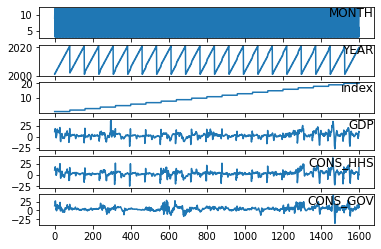

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.000000        0.0   0.666667   0.000000   0.610620   
2        0.0   0.012821        0.0   1.000000   0.000000   0.634448   
3        0.0   0.025641        0.0   0.000000   0.049995   0.660868   
4        0.0   0.038462        0.0   0.333333   0.049995   0.715590   
5        0.0   0.051282        0.0   0.666667   0.049995   0.668012   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var16(t)  var17(t)  \
1   0.570475   0.624252   0.209751    0.160984  ...  0.280247  0.370582   
2   0.596377   0.650676   0.200467    0.161682  ...  0.299290  0.338956   
3   0.651979   0.747177   0.207341    0.147472  ...  0.283015  0.294851   
4   0.684481   0.786702   0.212031    0.166478  ...  0.276578  0.190787   
5   0.641980   0.795389   0.207417    0.179080  ...  0.285893  0.187883   

   var18(t)  var19(t)  var20(t)  var21(t)  var22(t)  var23(t)  var24(t)  \
1  0.334462  0.534203  0.313915  0.582725  0.52

In [2]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from pandas import concat
# load dataset
dataset = read_csv('Database_rates_new1.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [1, 2, 3, 4, 5, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()
 
# convert series
# for the fce see https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): #n_in no of lag observations you want to create as columns, n_out no of observations as output
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	df_block=pd.DataFrame()
	for i in range(n_in, 0, -1): #n_in number of lag observations as input (X)
		for values in range(0,len(df)):
			start=int(values*80)
			end=int(start+80)
			df_sample=df.iloc[start:end,:]
			df_shifted=df_sample.shift(i) #shift series and create new column for every shifted series
			df_block=pd.concat([df_block,df_shifted])
		cols.append(df_block)
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# forecast sequence (t, t+1, ... t+n)
	df_sample=[]
	df_shifted=[]
	df_block=pd.DataFrame()
	for i in range(0, n_out):
		for values in range(0,len(df)):
			start=int(values*80)
			end=int(start+80)
			df_sample=df.iloc[start:end,:]
			df_shifted=df_sample.shift(-i)
			df_block=pd.concat([df_block,df_shifted])
		cols.append(df_block) #[put series forward for forecasting]
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = read_csv('Database_rates_new1.csv', header=0, index_col=0)
dataset=pd.DataFrame(dataset)

indexes=[]
time_total=[]
for values in range(1,22):
    ind=np.repeat(values,80).tolist()
    time=list(range(1,80))
    time_total=np.append(time_total,time)
    indexes=np.append(indexes,ind)
indexes=indexes[0:len(dataset)]
time_total=time_total[0:len(dataset)]
dataset['index']=indexes
dataset['time']=time_total
first_col=dataset.pop('index')
dataset.insert(0,'index',first_col)
first_col=dataset.pop('time')
dataset.insert(1,'time',first_col)

values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1) #thats the fce in the beginning, saying to create extra column for shifted series and also for forecasted series
#reframed=pd.DataFrame(reframed)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[1], axis=1, inplace=True)

reframed=pd.DataFrame(reframed)
print(reframed.head())
reframed.to_csv('reframed.csv')

#### Add line with 1.02

In [3]:
values_all=[]
for values in reframed.iloc[:,0]:
    if values==0:
        values_all=np.append(values_all,values)
czech_end=(len(values_all))

reframed1=reframed
length=len(reframed1)
data=[]
no_col=int(len(reframed1.columns)/2)
no_col_full=no_col*2
final=[]
for col in range(0,no_col):
    value=reframed1.iloc[czech_end-1,col+25]
    data=np.append(data,value)
print(data)
for col in range(no_col,no_col_full):
    data=np.append(data,1.02)
dataset=pd.DataFrame(data)
dataset=dataset.T
print(dataset)
dataset.columns=reframed1.columns
final=reframed1.append(dataset,ignore_index=True)
print(final.tail(5))
final.to_csv('final.csv')
final.to_csv('final_xgb.csv')
final.to_csv('final_rf.csv')
final.to_csv('final_xgb_exo.csv')
final.to_csv('final_rf_exo.csv')



[0.         0.         0.         0.33333334 1.         0.71835768
 0.65696883 0.67382723 0.2106802  0.19017249 0.86507058 0.6600889
 1.00000012 0.71649528 1.         0.26321784 0.31394765 0.32759988
 0.56939495 0.52760905 0.58004868 0.73972601 0.61109561 0.21515265
 0.58164227]
    0    1    2         3    4         5         6         7        8   \
0  0.0  0.0  0.0  0.333333  1.0  0.718358  0.656969  0.673827  0.21068   

         9   ...    40    41    42    43    44    45    46    47    48    49  
0  0.190172  ...  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  1.02  

[1 rows x 50 columns]
      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1576        1.0   0.192308        0.0   0.333333   0.900002   0.446003   
1577        1.0   0.205128        0.0   0.666667   0.900002   0.433401   
1578        1.0   0.217949        0.0   1.000000   0.900002   0.462007   
1579        1.0   0.230769        0.0   0.000000   0.949997   0.617418   
1580        0.0   0.

## MODELING PART
### RANDOM FOREST AND XGBOOST MODELS

This section estimates 200 rf/xgb models and selects those with the highest R-squared and lowest rmse to derive the final prediction.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
import numpy as geek
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

In [5]:
#### Select model
model='rf' #or 'xgb' or 'LSTM'

#### Randomly split data to test and train

In [18]:
dataset = pd.read_csv('final.csv') #GDP_tree_VARYoY_Yrf01.csv

val=list(range(0,no_col))
column_indices = [val]
new_names = ['index','index','date', 'day',	'month', 'year',	'GDP',	'CONS_HHS',	'CONS_GOV',	'THFK',	'THK',	'EXPORT', 'IMPORT',	'GDP_EA',	'WAGE',	'W_EA',	'L', 'CPI', 'NER', 'CONST_INDEX', 'CON_INDEX', 'IND_INDEX', 'RETAIL_INDEX',	'SERV_INDEX', 'IR', 'NX']
old_names = dataset.columns[column_indices]
dataset.rename(columns=dict(zip(old_names, new_names)), inplace=True)

#get vector of quarters and years to add to the new prediction line

#select values for the variables used in the model
hh=dataset.head()
from sklearn.model_selection import train_test_split
train_size=0.8 #0.8
train=pd.DataFrame()
test=pd.DataFrame()

import random
random_train=[]
random_test=[]
train_bulk=[]
test_bulk=[]

train_value=int(80*train_size)
train_bulk=random.sample(range(79), train_value)
train_bulk=np.sort(train_bulk)
vector=list(range(0,80))

for j in range(0,79):
    if j not in train_bulk:
        test_bulk.append(j)
celek=int(len(dataset)/80)+1
for val in range(0,celek):
    val=int(val)
    vall=val*80+80
    if vall<len(dataset):
        for v in train_bulk:
            train_sample=dataset.iloc[v+79*val,:]
            train_sample=pd.DataFrame(train_sample)
            train_sample=train_sample.T
            train=train.append(train_sample)
            #train=pd.concat([train,train_sample])
        for h in test_bulk:
            test_sample=dataset.iloc[h+79*val,:]
            test_sample=pd.DataFrame(test_sample)
            test_sample=test_sample.T
            test=test.append(test_sample)

/Users/stevengawthorpe/.pyenv/versions/my-env/lib/python3.8/site-packages/pandas/core/indexes/base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [12]:
quarter=[]
years=[]
for k in range(19):
    quarter=(2021+k)
    for i in range(4):
        years.append(quarter)
import numpy
year=years[2:20]
months=[]
quarters=[0]
for k in range(4):
    quarter=((k+1)*3)
    months.append(quarter)
month=numpy.tile(months,19)
month=month[2:len(year)+2]
print(year)
print(month)

[2021, 2021, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024, 2025, 2025, 2025, 2025]
[ 9 12  3  6  9 12  3  6  9 12  3  6  9 12  3  6  9 12]


#### Model

In [ ]:
model='xgb'

dataset = pd.read_csv('final.csv')
dataset_names = pd.read_csv('final.csv')
no_col=int(len(dataset.columns)/2)

no_col_full=no_col*2
matrix = geek.zeros([no_col_full, no_col_full])
matrix_row = pd.Series
vector_zeros=[0]*300
delka=len(vector_zeros)

values_all=[]
for values in reframed.iloc[:,0]:
    if values==0:
        values_all=np.append(values_all,values)
czech_end=(len(values_all))

result_endo_pred=pd.DataFrame()
dataframe_endo=pd.DataFrame()
result_endo_pred1=pd.DataFrame()
dataframe_endo=pd.DataFrame()
values=pd.DataFrame()
values_all=pd.DataFrame()

result=0
result_total=np.zeros(no_col-5)

for time in range(1,11): #20
    #Code for random split
    dataset = pd.read_csv('final.csv')
    val=list(range(0,no_col))
    column_indices = [val]
    new_names = ['index','index','date', 'day',	'month', 'year',	'GDP',	'CONS_HHS',	'CONS_GOV',	'THFK',	'THK',	'EXPORT', 'IMPORT',	'GDP_EA',	'WAGE',	'W_EA',	'L', 'CPI', 'NER', 'CONST_INDEX', 'CON_INDEX', 'IND_INDEX', 'RETAIL_INDEX',	'SERV_INDEX', 'IR', 'NX']
    old_names = dataset.columns[column_indices]
    dataset.rename(columns=dict(zip(old_names, new_names)), inplace=True)

    hh=dataset.head()
    from sklearn.model_selection import train_test_split
    train_size=0.8 #0.8
    train=pd.DataFrame()
    test=pd.DataFrame()

    import random
    random_train=[]
    random_test=[]
    train_bulk=[]
    test_bulk=[]

    train_value=int(80*train_size)
    train_bulk=random.sample(range(79), train_value)
    train_bulk=np.sort(train_bulk)
    vector=list(range(0,80))

    for j in range(0,79):
        if j not in train_bulk:
            test_bulk.append(j)
    celek=int(len(dataset)/80)+1
    for val in range(0,celek):
        val=int(val)
        vall=val*80+80
        if vall<len(dataset):
            for v in train_bulk:
                train_sample=dataset.iloc[v+79*val,:]
                train_sample=pd.DataFrame(train_sample)
                train_sample=train_sample.T
                train=train.append(train_sample)
            for h in test_bulk:
                test_sample=dataset.iloc[h+79*val,:]
                test_sample=pd.DataFrame(test_sample)
                test_sample=test_sample.T
                test=test.append(test_sample)
    #end of random split

    for x in range(1,11):#21

        scenario=x
        sum_result=sum(result_total)
        print('sum_result',min(result_total))
        #--------------------- EXOGENOUS FORECAST
        if min(result_total)>0:
            #read the dataset where we will add the new line of the exogeneous prediction
            if model=='xgb':
                dataset_exo = pd.read_csv('final_xgb_exo.csv') 
            elif model=='rf':
                dataset_exo = pd.read_csv('final_rf_exo.csv') 
            dataset_pd=pd.DataFrame(dataset_exo)

            dataset_pd=dataset_pd.replace({dataset_names.columns[26]:{1.02:1}})
            dataset_pd=dataset_pd.replace({dataset_names.columns[28]:{1.02:0}})

            if time==1:
                dataset_pd=dataset_pd.replace({dataset_names.columns[27]:{1.02:dataset_pd.iloc[czech_end,2]}})
                dataset_pd=dataset_pd.replace({dataset_names.columns[29]:{1.02:dataset_pd.iloc[czech_end,4]}})
                dataset_pd=dataset_pd.replace({dataset_names.columns[30]:{1.02:dataset_pd.iloc[0,5]}})

            if time!=1:
                dataset_pd=dataset_pd.replace({dataset_names.columns[27]:{1.02:dataset_pd.iloc[20+time,2]}})
                dataset_pd=dataset_pd.replace({dataset_names.columns[29]:{1.02:dataset_pd.iloc[len(dataset_pd)-4,4]}})
                dataset_pd=dataset_pd.replace({dataset_names.columns[30]:{1.02:dataset_pd.iloc[78+time,5]}})

            for var in range(0,no_col-5):
                dataset_pd=dataset_pd.replace({dataset_names.columns[var+no_col+6] : {1.02: matrix[vector_zeros[time-2],var]}}) 
            

            dataset_new=dataset_pd
            dataset_new.columns=dataset_names.columns
            quarter=[]
            years=[]
            for k in range(19):
                quarter=(2021+k)
                for i in range(4):
                    years.append(quarter)
            import numpy
            year=years[2:20]
            months=[]
            quarters=[0]
            for k in range(4):
                quarter=((k+1)*3)
                months.append(quarter)
            month=numpy.tile(months,19)
            month=month[2:len(year)+2]

            #append new values for exogenous forecasts to the dataset
            data=np.zeros(no_col_full)
            final=[]
            for col in range(0,no_col):
                data[col]=dataset_new.iloc[len(dataset_new)-1,26+col]   
            for col in range(no_col,no_col_full): #-5
                data[col]=1.02
            dataset_line=pd.DataFrame(data)
            dataset_line=dataset_line.T
            dataset_line.columns=dataset_pd.columns[1:]
            #dataset_line=dataset_line.replace({dataset_names.columns[3]:{0:1}})
            #dataset_line=dataset_line.replace({dataset_names.columns[4]:{0:month[vector_zeros[time-2]]}})
            #dataset_line=dataset_line.replace({dataset_names.columns[5]:{0:year[vector_zeros[time-2]]}})
            final=dataset_new.append(dataset_line,ignore_index=True)
            
            if model=='xgb':
                final.to_csv('final_xgb_exo.csv', index=False) 
            
            if model=='rf':
                final.to_csv('final_rf_exo.csv', index=False) 
            
        if model=='xgb':
            dataset = pd.read_csv('final.csv')
        elif model=='rf':
            dataset = pd.read_csv('final.csv') 
        val=list(range(0,no_col))
        column_indices = [val]
        new_names = ['index','date', 'day',	'month', 'year',	'GDP',	'CONS_HHS',	'CONS_GOV',	'THFK',	'THK',	'EXPORT', 'IMPORT',	'GDP_EA',	'WAGE',	'W_EA',	'L', 'CPI', 'NER', 'CONST_INDEX', 'CON_INDEX', 'IND_INDEX', 'RETAIL_INDEX',	'SERV_INDEX', 'IR', 'NX']
        old_names = dataset.columns[column_indices]
        dataset.rename(columns=dict(zip(old_names, new_names)), inplace=True)

        #get vector of quarters and years to add to the new prediction line

        #select values for the variables used in the model
        hh=dataset.head()
        from sklearn.model_selection import train_test_split

        # Split the data into training and testing sets
        
        # if non-random selection:

        #values = dataset.values
        #train_size=0.6 #0.8
        #train=pd.DataFrame()
        #test=pd.DataFrame()

        #for val in range(0,len(dataset)):
        #    start_train=int(val*80)
        #    end_train=int(start_train+80*train_size)
        #    start_test=int(end_train)
        #    end_test=int(start_train+80)
        #    train_sample=dataset.iloc[start_train:end_train,:]
        #    test_sample=dataset.iloc[start_test:end_test,:]
        #    train=pd.concat([train,train_sample])
        #    test=pd.concat([test,test_sample])
        #test=pd.DataFrame(test)

        # how long testing data for Czechia
        import numpy as np
        testing=test.iloc[:,1].values
        occ=np.count_nonzero(testing==0)

        if x==1:
            X_before=train.iloc[:,0:11].values
            X_others=train.iloc[:,13:no_col].values
            train_features=np.concatenate((X_before,X_others), axis=1) #features
            X_before_test=test.iloc[0:occ,0:11].values #9,11
            X_others_test=test.iloc[0:occ,13:no_col].values
            test_features=np.concatenate((X_before_test,X_others_test), axis=1) #features
        if x!=1:
            train_features=train.iloc[:, 0:(no_col)].values
            test_features=test.iloc[0:occ, 0:(no_col)].values
        
        train_labels = train.iloc[:, no_col+6+x-1].values
        test_labels = test.iloc[0:occ, no_col+6+x-1].values
        labels = dataset.iloc[:, no_col+6+x-1].values

        if model=='LSTM':
            # reshape input to be 3D as required by LSTM [samples, timesteps, features]
            train_features = train_features.reshape((train_features.shape[0], 1, train_features.shape[1]))
            test_features = test_features.reshape((test_features.shape[0], 1, test_features.shape[1]))
            #print(train_features.shape, train_labels.shape, test_features.shape, test_labels.shape)
            #print(test_features.shape[2])

        #Running this example prints the shape of the train and test input and output sets
        #make exogenous forecast from the randomly selected values and always add future row to get future predictions
        if scenario==no_col or scenario==1: 
            future_row1=dataset.iloc[(len(dataset)-1):(len(dataset)), 0:11].values
            future_row2=dataset.iloc[(len(dataset)-1):(len(dataset)), 13:no_col].values
            future_row=np.concatenate((future_row1,future_row2), axis=1)
            future_features=test_features
            future=geek.zeros([len(test_features)+2, no_col-2])

        elif scenario!=no_col and scenario!=1: #estimate the remaining models with regards to Export and Import variables
            future_row=dataset.iloc[(len(dataset)-1):(len(dataset)), 0:no_col].values
            future_features=test_features
            future=geek.zeros([len(test_features)+2, no_col])
        future_labels=future[0:len(test_labels), 1]*0
        future[0:len(test_features),:]=future_features
        future[len(test_features),:]=future_row
        future=future[1:(len(future)-1),:]

        future_labels[0:(len(test_labels)-1)]=test_labels[1:(len(test_labels))]
        future_labels[(len(future_labels)-1):len(future_labels)]=labels[len(labels)-1]

        # Saving feature names for later use
        feature_list= ['index','date', 'day',	'month', 'year',	'GDP',	'CONS_HHS',	'CONS_GOV',	'THFK',	'THK',	'EXPORT', 'IMPORT',	'GDP_EA',	'WAGE',	'W_EA',	'L', 'CPI', 'NER', 'CONST_INDEX', 'CON_INDEX', 'IND_INDEX', 'RETAIL_INDEX',	'SERV_INDEX', 'IR']
        baseline_preds = test_features[0:occ,13]

        # Baseline errors, and display average baseline error
        baseline_errors = abs(baseline_preds - test_labels)

        # Import the model we are using
        from sklearn.ensemble import RandomForestRegressor
        # Instantiate model with 1000 decision trees
        rf = RandomForestRegressor(n_estimators= 1000) #, random_state=42
        xgb = XGBRegressor(importance_type='gain',objective='reg:squarederror',n_estimators= 1000)

        # Train the model on training data
        rf.fit(train_features, train_labels)
        xgb.fit(train_features, train_labels)

        # # Use the forest's predict method on the test data
        prediction_rf = rf.predict(test_features)
        prediction_xgb=xgb.predict(test_features)
        prediction_xgb_exo=xgb.predict(future)
        prediction_rf_exo=rf.predict(future)
        if model=='xgb':
            predictions=prediction_xgb 
            predictions_exo=prediction_xgb_exo
        if model=='rf':
            predictions=prediction_rf
            predictions_exo=prediction_rf_exo

        if model=='xgb':
            predictions=prediction_xgb 
            predictions_exo=prediction_xgb_exo
        if model=='rf':
            predictions=prediction_rf
            predictions_exo=prediction_rf_exo
        # Calculate the absolute errors
        errors = abs(predictions - test_labels)
        # Print out the mean absolute error (mae)
        mae=(round(np.mean(errors), 2))
        # # Calculate mean absolute percentage error (MAPE)
        mape = 100 * abs(errors /(test_labels))
        # Calculate and display accuracy
        accuracy = 100 - np.mean(mape)
        print('Accuracy:', round(accuracy, 2), '%.')
        from sklearn.metrics import mean_squared_error
        from math import sqrt
        from sklearn.metrics import r2_score

        rms = sqrt(mean_squared_error(test_labels, predictions)) #tip: measure for testing and training data, compare difference

        # from sklearn.metrics import mean_squared_error, r2_score
        model_score =  metrics.r2_score(test_labels, predictions)
        r2=(model_score)

        # measure the accuracy of the model for all the test values without the last value that enters the endogenous or exogenous prediction
        r2_endo=predictions*0
        rms_endo = predictions*0
        errors_endo = predictions*0
        mae_endo = predictions*0
        for per in range(0,len(predictions)):
            test_labels_endo=test_labels[0:(len(test_labels)-1)]*0
            predictions_endo=predictions[0:(len(predictions)-1)]*0
                
            if per>0:
                test_labels_endo[0:(per-1)]=test_labels[0:(per-1)]
                predictions_endo[0:(per-1)]=predictions[0:(per-1)]
                test_labels_endo[(per):len(test_labels_endo)]=test_labels[(per+1):len(test_labels)]
                predictions_endo[per:len(predictions_endo)]=predictions[(per+1):len(predictions)]

            if per==0:
                test_labels_endo[0:len(test_labels_endo)]=test_labels[1:len(test_labels)]
                predictions_endo[0:len(predictions_endo)]=predictions[1:len(predictions)]

            r2_endo[per]=metrics.r2_score(test_labels_endo, predictions_endo)
            rms_endo[per]=sqrt(mean_squared_error(test_labels_endo, predictions_endo))
            errors_endo = abs(predictions_endo - test_labels_endo)
            mae_endo[per]=(round(np.mean(errors_endo), 2))

        model_score_future= metrics.r2_score(future_labels[0:(len(future_labels)-1)], predictions_exo[0:(len(predictions_exo)-1)])
        r2_future=model_score_future
        rms_future=sqrt(mean_squared_error(future_labels[0:(len(future_labels)-1)], predictions_exo[0:(len(predictions_exo)-1)]))

        print("Mean squared error: %.2f"% mean_squared_error(test_labels, predictions))
        mse=(mean_squared_error(test_labels, predictions))
        # Explained variance score: 1 is perfect prediction
        print('Test Variance score: %.2f' % r2_score(test_labels, predictions))
        r2score=(r2_score(test_labels, predictions))

        score=rf.score(test_features, test_labels)

        #---------------------ENDOGENOUS FORECAST
        #---------------------Append forecast to original dataset

        #read the dataset where you want to add the endogenous forecast
        if model=='xgb':
            dataset1 = pd.read_csv('final_xgb.csv')
        if model=='rf':
            dataset1 = pd.read_csv('final_rf.csv')
        dataset_endo=dataset1.values
        dfObj = pd.DataFrame(dataset_endo)

        import datetime
        test=pd.DataFrame(test)
        together=test.iloc[:,1:no_col+1].values
        inv_transformed=scaler.inverse_transform(together)
        inv_transformed=pd.DataFrame(inv_transformed)
        
        country_ind = inv_transformed.iloc[:,0]
        months = inv_transformed.iloc[:,3]
        days = inv_transformed.iloc[:,2] 
        years = round(inv_transformed.iloc[:,4]) 
        test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
        test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

        #this line is important for the exogenous forecast
        #only if all the variables are now predicted for the future add 1 to the vector called vector_zeros so you can add new line to the "matrix" filled with future values.
        if min(result_total)>0:
            vector_zeros[time-1]=vector_zeros[time-2]+1
            for k in range(time,delka-1):
                vector_zeros[k]=vector_zeros[k-1]
            result=0
            sum_result=0
            result_total=np.zeros(no_col-5)

        if model=='xgb':
            result=prediction_xgb_exo[len(prediction_xgb_exo)-1]
        if model=='rf':
            result=prediction_rf_exo[len(prediction_rf_exo)-1]
        result_total[x-1]=result
        matrix[vector_zeros[time-1],x-1]=result
        dates=test_dates
        rms_endo=rms_endo
        rms=rms
        mae=mae_endo
        mape=mape
        acc=accuracy
        mse=mse 
        r2=r2
        r2score=r2score
        r2_endo=r2_endo
        result_endo=predictions
        #append the endogenous prediction values to the original dataset1
        blocks = np.array([result_endo[0:occ]]).T
        blocks=pd.DataFrame(blocks)

        result_endo_pred[x-1]=blocks.iloc[:,0]
    
    result_endo_pred1=pd.concat([result_endo_pred1,result_endo_pred],ignore_index=True)

    values=pd.DataFrame()
    ran=[5,4,3,2,1]
    for val in ran:
        hod=ran.index(val)
        values[hod]=test.iloc[0:occ,val]
    values_all=values_all.append(values)

dataframe_endo=pd.DataFrame()
values_all=values_all.reset_index()
dataframe_endo=pd.concat([values_all,result_endo_pred1],axis=1,ignore_index=True)

colum_all=[]
colum_all=['index']
colum_all.append(dataset1.columns[5])
colum_all.append(dataset1.columns[4])
colum_all.append(dataset1.columns[3])
colum_all.append(dataset1.columns[2])
colum_all.append(dataset1.columns[1])
for cn in range(6,len(dataframe_endo.columns)):
    colum_endo=dataset1.columns[cn]
    colum_all.append(colum_endo)
dataframe_endo.columns=colum_all
dataset1=pd.concat([dataset1,dataframe_endo],ignore_index=True)

cut=(dataset1.iloc[:,7])
cut=cut.dropna()
cut=len(cut)
dataset1=dataset1.iloc[0:int(cut),:]
print(dataset1.tail(15))
if model=='rf':
    dataset1.to_csv('final_rf.csv', index=False)
if model=='xgb':
    dataset1.to_csv('final_xgb.csv', index=False)

## GDP GRAPH

#### Transform matrix back

In [ ]:

for file in ('final_rf.csv','final_rf_exo.csv','final_xgb.csv','final_xgb_exo.csv'):
    transform_back=pd.read_csv(file)
    transform_back=transform_back.values[:,1:26]
    inv_transformed=scaler.inverse_transform(transform_back)
    inv_transformed=pd.DataFrame(inv_transformed)
    inv_transformed.iloc[:,4]=round(inv_transformed.iloc[:,4])
    inv_transformed.iloc[:,3]=round(inv_transformed.iloc[:,3])
    column_indices=inv_transformed.columns
    
    new_names = ['index','date', 'day',	'month', 'year',	'GDP',	'CONS_HHS',	'CONS_GOV',	'THFK',	'THK',	'EXPORT', 'IMPORT',	'GDP_EA',	'WAGE',	'W_EA',	'L', 'CPI', 'NER', 'CONST_INDEX', 'CON_INDEX', 'IND_INDEX', 'RETAIL_INDEX',	'SERV_INDEX', 'IR', 'NX']
    old_names = inv_transformed.columns#[column_indices]
    inv_transformed.rename(columns=dict(zip(old_names, new_names)), inplace=True)
    
    val=list(range(0,len(inv_transformed)))
    inv_transformed['values']=val
    #print(inv_transformed.iloc[-1:-5,10:15])

    transform_back2=pd.read_csv(file)
    transform_back2=transform_back2.values[:,26:51]
    inv_transformed2=scaler.inverse_transform(transform_back2)
    inv_transformed2=pd.DataFrame(inv_transformed2)
    inv_transformed2.iloc[:,4]=round(inv_transformed2.iloc[:,4])
    column_indices=inv_transformed2.columns
    new_names = ['indext','datet', 'dayt',	'montht', 'yeart',	'GDPt',	'CONS_HHSt',	'CONS_GOVt',	'THFKt',	'THKt',	'EXPORTt', 'IMPORTt',	'GDP_EAt',	'WAGEt',	'W_EAt',	'Lt', 'CPIt', 'NERt', 'CONST_INDEXt', 'CON_INDEXt', 'IND_INDEXt', 'RETAIL_INDEXt',	'SERV_INDEXt', 'IRt', 'NXt']
    old_names = inv_transformed2.columns#[column_indices]
    inv_transformed2.rename(columns=dict(zip(old_names, new_names)), inplace=True)
    val=list(range(0,len(inv_transformed2)))
    inv_transformed2.insert(0,'values',val)
    
    inv_transformed_total=pd.merge(inv_transformed,inv_transformed2,on="values")
    inv_transformed_total=inv_transformed_total.drop(['values','indext','datet','dayt','montht','yeart'],axis=1)
    d={'day':inv_transformed_total.iloc[:,2],	'month':inv_transformed_total.iloc[:,3],	'year':inv_transformed_total.iloc[:,4],	'dy':inv_transformed_total.iloc[:,5],	'dc':inv_transformed_total.iloc[:,6],	'dx':inv_transformed_total.iloc[:,10],	'dm':inv_transformed_total.iloc[:,11],	'dR':inv_transformed_total.iloc[:,23],	'dConSen_bal':inv_transformed_total.iloc[:,19],	'dPMI_manuf':inv_transformed_total.iloc[:,20],	'dInd_conf':inv_transformed_total.iloc[:,20],	'dConst_conf':inv_transformed_total.iloc[:,18],	'dw':inv_transformed_total.iloc[:,13], 'yt':inv_transformed_total.iloc[:,25],	'ct':inv_transformed_total.iloc[:,26],	'yeat':inv_transformed_total.iloc[:,32],	'xt':inv_transformed_total.iloc[:,30],	'mt':inv_transformed_total.iloc[:,31],	'Rt':inv_transformed_total.iloc[:,43],	'ConSen_balt':inv_transformed_total.iloc[:,39],	'PMI_manuft':inv_transformed_total.iloc[:,40],	'Ind_conft':inv_transformed_total.iloc[:,40],	'Const_conft':inv_transformed_total.iloc[:,38],	'wt':inv_transformed_total.iloc[:,33], 'dyea':inv_transformed_total.iloc[:,11]}
    inv_transformed_compared=pd.DataFrame(data=d)
    if file=='final_rf.csv':
        inv_transformed_compared.to_csv('rf_transform_back.csv',index=False)
    if file=='final_rf_exo.csv':
        inv_transformed_compared.to_csv('rf_exo_transform_back.csv',index=False)
    if file=='final_xgb.csv':
        inv_transformed_compared.to_csv('xgb_transform_back.csv',index=False)
    if file=='final_xgb_exo.csv':
        inv_transformed_compared.to_csv('xgb_exo_transform_back.csv',index=False)
    print(len(inv_transformed_compared))


#### GRAPHS FOR THE VARIABLES

In [61]:

model='rf' #type 'rf' if you want the variable importance graphs for the random forest model

import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import plotly
import chart_studio
chart_studio.tools.set_credentials_file(username='sgawthor', api_key='wa3B5oJOSFTqcBuopZI2')
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
import numpy as geek
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#set subplots
for x in range(1,5): #get results for the first four variables
    scenario=x
    if model=='xgb':
        dataset = pd.read_csv('xgb_exo_transform_back.csv')
    if model=='rf':
        dataset = pd.read_csv('rf_exo_transform_back.csv')
    #1=y
    hh=dataset.head()
    X = dataset.iloc[:, 0:14].values #25
    y = dataset.iloc[:, 14].values

    #2=c
    yc=dataset.iloc[:, 15].values
    Xc=dataset.iloc[:, 0:14].values

    #3=yea
    yea=dataset.iloc[:, 16].values
    Xea=dataset.iloc[:, 0:14].values

    #4=x
    yx=dataset.iloc[:, 17].values
    Xx=dataset.iloc[:, 0:14].values

    #5=m
    ym=dataset.iloc[:, 18].valuesdataset = pd.read_csv('final.csv') #GDP_tree_VARYoY_Yrf01.csv

val=list(range(0,no_col))
column_indices = [val]
new_names = ['index','index','date', 'day',	'month', 'year',	'GDP',	'CONS_HHS',	'CONS_GOV',	'THFK',	'THK',	'EXPORT', 'IMPORT',	'GDP_EA',	'WAGE',	'W_EA',	'L', 'CPI', 'NER', 'CONST_INDEX', 'CON_INDEX', 'IND_INDEX', 'RETAIL_INDEX',	'SERV_INDEX', 'IR', 'NX']
old_names = dataset.columns[column_indices]
dataset.rename(columns=dict(zip(old_names, new_names)), inplace=True)

#get vector of quarters and years to add to the new prediction line

#select values for the variables used in the model
hh=dataset.head()
from sklearn.model_selection import train_test_split
train_size=0.8 #0.8
train=pd.DataFrame()
test=pd.DataFrame()

import random
random_train=[]
random_test=[]
train_bulk=[]
test_bulk=[]

train_value=int(80*train_size)
train_bulk=random.sample(range(79), train_value)
train_bulk=np.sort(train_bulk)
vector=list(range(0,80))

for j in range(0,79):
    if j not in train_bulk:
        test_bulk.append(j)
celek=int(len(dataset)/80)+1
for val in range(0,celek):
    val=int(val)
    vall=val*80+80
    if vall<len(dataset):
        for v in train_bulk:
            train_sample=dataset.iloc[v+79*val,:]
            train_sample=pd.DataFrame(train_sample)
            train_sample=train_sample.T
            train=train.append(train_sample)
            #train=pd.concat([train,train_sample])
        for h in test_bulk:
            test_sample=dataset.iloc[h+79*val,:]
            test_sample=pd.DataFrame(test_sample)
            test_sample=test_sample.T
            test=test.append(test_sample)
    Xm=dataset.iloc[:, 0:14].values

    #6=R
    yR=dataset.iloc[:, 19].values
    XR=dataset.iloc[:, 0:14].values

    #7=ConSen_bal
    yCon=dataset.iloc[:, 20].values
    XCon=dataset.iloc[:, 0:14].values

    #8=PMI_manuf
    yPMI_manuf=dataset.iloc[:, 21].values
    XPMI_manuf=dataset.iloc[:, 0:14].values

    #9=Ind_conf
    yInd_conf=dataset.iloc[:, 22].values
    XInd_conf=dataset.iloc[:, 0:14].values

    #10=Const_conf
    yConst_conf=dataset.iloc[:, 23].values
    XConst_conf=dataset.iloc[:, 0:14].values

    #11=w
    yw=dataset.iloc[:, 24].values
    Xw=dataset.iloc[:, 0:14].values
    

    if scenario==1:
        name='dy'
        features=X
        labels=y
    elif scenario==2:
        name='dc'
        features=Xc
        labels=yc
    elif scenario==3:
        name='dyea'
        features=Xea
        labels=yea
    elif scenario==4:
        name='dx'
        features=Xx
        labels=yx
    elif scenario==5:
        name='dm'
        features=Xm
        labels=ym
    elif scenario==6:
        name='dR'
        features=XR
        labels=yR
    elif scenario==7:
        name='dConSen_bal'
        features=XCon
        labels=yCon
    elif scenario==8:
        name='dPMI_manuf'
        features=XPMI_manuf
        labels=yPMI_manuf
    elif scenario==9:
        name='dInd_conf'
        features=XInd_conf
        labels=yInd_conf
    elif scenario==10:
        name='dConst_conf'
        features=XConst_conf
        labels=yConst_conf
    elif scenario==11:
        name='dw'
        features=Xw
        labels=yw    

    from sklearn.model_selection import train_test_split

    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

 
    # Saving feature names for later use
    feature_list=['day', 'month', 'year', 'Ldy', 'dc', 'dyea', 'dx',	'dm', 'dR', 'dConSen_bal', 'dPMI_manuf', 'dInd_conf', 'dConst_conf', 'dw']
    baseline_preds = test_features[:, feature_list.index('dyea')]

    # Baseline errors, and display average baseline error
    baseline_errors = abs(baseline_preds - test_labels)

    # Import the model we are using
    from sklearn.ensemble import RandomForestRegressor
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators= 1000, random_state=42)
    xgb = XGBRegressor()

    # Train the model on training data
    rf.fit(train_features, train_labels)
    xgb.fit(train_features, train_labels)

    # Use the forest's predict method on the test data
    predictions_xgb=xgb.predict(test_features)
    predictions_rf=rf.predict(test_features)
    if model=='rf':
        predictions=predictions_rf
    if model=='xgb':
        predictions=predictions_xgb

    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
   
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * abs(errors /(test_labels))
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape) #one outlier prediction can bias it
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    from sklearn.metrics import r2_score

    rms = sqrt(mean_squared_error(test_labels, predictions)) #rms = sqrt(mean_squared_error(y_actual, y_predicted))

    # from sklearn.metrics import mean_squared_error, r2_score
    model_score =  metrics.r2_score(test_labels, predictions)

    score=rf.score(test_features, test_labels)

    # #--------------------Variable importance
    # Get numerical feature importances
    importances = list(rf.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

 #------------------VISUALIZATION
 # FIRST VISUALIZE THE VARIABLES' IMPORTANCE FOR EACH MODEL

#   bar plot of the feature importances 
    import matplotlib.pyplot as plt

    #matplotlib inline
    # Set the style
    plt.style.use('fivethirtyeight')
    fig1, ax = plt.subplots(facecolor=(1,1,1)) 
     # list of x locations for plotting
    x_values = list(range(len(importances)))
    # Make a bar chart
    plt.bar(x_values, importances, orientation = 'vertical')
    ax = plt.gca()
    ax.set_facecolor('linen')
    # Tick labels for x axis
    feature_list1=['day', 'month', 'year', 'y', 'c', 'yea', 'x',	'm', 'R', 'HHs conf.', 'PMI manuf.', 'Ind conf.', 'Const conf.', 'w']
    plt.xticks(x_values, feature_list1, rotation='vertical')
    # Axis labels and title
    plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
    fig1 = plt.gcf()
    ax.set_facecolor('white')

    # Write graph to a png file
    var_name = 'Forest_importance_Y'
    var_name += name
    var_name += '.png'
    fig1.savefig(var_name, bbox_inches='tight', dpi=100, facecolor=fig1.get_facecolor())# edgecolor='none'

 




/Users/stevengawthorpe/.pyenv/versions/my-env/lib/python3.8/site-packages/pandas/core/indexes/base.py:3941: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [9]:
model='rf' #type 'rf' if you want the variable importance graphs for the random forest model

import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import plotly
import chart_studio
chart_studio.tools.set_credentials_file(username='sgawthor', api_key='wa3B5oJOSFTqcBuopZI2')
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
import numpy as geek
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# SECOND VISUALIZE THE PREDICTIONS FROM THE PREVIOUSLY ESTIMATED MODELS
for x in range(1,5):
    scenario=x
 # Read the csv files with the obtained values
    dataset_base=pd.read_csv('final.csv')
    dataset1 = pd.read_csv('rf_transform_back.csv') #rf
    dataset1_exo = pd.read_csv('rf_exo_transform_back.csv') #rf

    dataset3 = pd.read_csv('xgb_transform_back.csv') #xgb
    dataset3_exo = pd.read_csv('xgb_exo_transform_back.csv') #xgb

    dataset_names=['day',	'month',	'year',	'dy',	'dc',	'dx',	'dm',	'dR',	'dConSen_bal',	'dPMI_manuf',	'dInd_conf',	'dConst_conf',	'dw', 'yt',	'ct',	'yeat',	'xt',	'mt',	'Rt',	'ConSen_balt',	'PMI_manuft',	'Ind_conft',	'Const_conft',	'wt', 'dyea']
    dataset_pd=dataset1_exo.iloc[0:len(dataset1_exo), 0:25].values #55
    #dataset_pd[0:len(dataset1_exo),5:24]=dataset1_exo.iloc[0:len(dataset1_exo), 6:25].values
    dataset_pd1=dataset1.iloc[len(dataset1_exo):len(dataset1), 0:25].values
    #dataset_pd1[:,5:24]=dataset1.iloc[len(dataset1_exo):len(dataset1), 6:25].values
    dataset_pd_xgb=dataset3_exo.iloc[0:len(dataset3_exo), 0:25].values #55
    #dataset_pd_xgb[:,5:24]=dataset3_exo.iloc[0:len(dataset3_exo), 6:25].values
    dataset_pd1_xgb=dataset3.iloc[len(dataset3_exo):len(dataset3), 0:25].values
    #dataset_pd1_xgb[:,5:24]=dataset3.iloc[len(dataset3_exo):len(dataset3), 6:25].values

    #create dataframes
    dfObj = pd.DataFrame(dataset_pd, columns=dataset_names)
    dfObj1=pd.DataFrame(dataset_pd1,columns=dataset_names)
    dfObj=dfObj.append(dfObj1) #append the endogenous forecasts to the datafile containing also exogenous forecasts
    dfObj_xgb = pd.DataFrame(dataset_pd_xgb, columns=dataset_names)
    dfObj1_xgb=pd.DataFrame(dataset_pd1_xgb,columns=dataset_names)
    dfObj_xgb=dfObj_xgb.append(dfObj1_xgb) #append the endogenous forecasts to the datafile containing also exogenous forecasts

    dfObj_xgb.to_csv('GDP_xgb_blog.csv', index=False)
    dataset4 = pd.read_csv('GDP_xgb_blog.csv')

    dfObj.to_csv('GDP_rf_blog.csv', index=False)
    dataset2 = pd.read_csv('GDP_rf_blog.csv') 

    #reat csv with the Ministry of Finance and the Czech National Bank predictions
    dataset_mfcnb = pd.read_csv('cnb_mf_predikce.csv')

    #GRAPH
    import matplotlib.pyplot as plt
    # Use datetime for creating date objects for plotting
    import datetime
    # Dates of training values
    months = dataset2.iloc[0:len(dataset2), 1].values
    days = dataset2.iloc[0:len(dataset2), 0].values
    years = dataset2.iloc[0:len(dataset2), 2].values
    months_xgb = dataset4.iloc[0:len(dataset4), 1].values
    days_xgb = dataset4.iloc[0:len(dataset4), 0].values
    years_xgb = dataset4.iloc[0:len(dataset4), 2].values
    months_mfcnb = dataset_mfcnb.iloc[0:54, 1].values
    days_mfcnb = dataset_mfcnb.iloc[0:54, 0].values
    years_mfcnb = dataset_mfcnb.iloc[0:54, 2].values
    # List and then convert to datetime object
    dates_endo = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
    dates_endo = [datetime.datetime.strptime(date_endo, '%Y-%m-%d') for date_endo in dates_endo]

    dates_endo_xgb = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years_xgb, months_xgb, days_xgb)]
    dates_endo_xgb = [datetime.datetime.strptime(date_endo, '%Y-%m-%d') for date_endo in dates_endo_xgb]

    dates_endo_mfcnb = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years_mfcnb, months_mfcnb, days_mfcnb)]
    dates_endo_mfcnb = [datetime.datetime.strptime(date_endo, '%Y-%m-%d') for date_endo in dates_endo_mfcnb]

    # Dataframe with true values and date
    true_data_endo = pd.DataFrame(data = {'date_endo': dates_endo[0:79], 'actual_endo': dataset2.iloc[0:79, 2+x].values})
    # Dataframe with exogenous predictions
    predictions_data = pd.DataFrame(data = {'date_endo': dates_endo[len(dataset1_exo):len(dataset1)], 'prediction': dataset2.iloc[len(dataset1_exo):len(dataset1), 2+x].values})
    predictions_data_xgb = pd.DataFrame(data = {'date_endo': dates_endo_xgb[len(dataset3_exo):len(dataset3)], 'prediction': dataset4.iloc[len(dataset3_exo):len(dataset3), 2+x].values})
    # Dates of predictions

    quarter=[]
    years=[]
    for k in range(19):
        quarter=(2021+k)
        for i in range(4):
            years.append(quarter)
    import numpy
    year=years[1:22]

    months = dataset2.iloc[len(dataset1_exo):len(dataset1), 1].values
    days = dataset2.iloc[len(dataset1_exo):len(dataset1), 0].values
    years = dataset2.iloc[len(dataset1_exo):len(dataset1), 2].values
    months_exo = dataset2.iloc[len(dataset_base)-1:len(dataset1_exo), 1].values
    days_exo = dataset2.iloc[len(dataset_base)-1:len(dataset1_exo), 0].values
    years_exo = year[0:len(days_exo)]
    months_xgb = dataset4.iloc[len(dataset3_exo):len(dataset3), 1].values
    days_xgb = dataset4.iloc[len(dataset3_exo):len(dataset3), 0].values
    years_xgb = dataset4.iloc[len(dataset3_exo):len(dataset3), 2].values
    # Column of dates
    test_dates_endo = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
    test_dates_exo = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years_exo, months_exo, days_exo)]
    test_dates_endo_xgb = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years_xgb, months_xgb, days_xgb)]
    # Convert to datetime objects
    test_dates_endo = [datetime.datetime.strptime(date_endo, '%Y-%m-%d') for date_endo in test_dates_endo]
    test_dates_endo_xgb = [datetime.datetime.strptime(date_endo, '%Y-%m-%d') for date_endo in test_dates_endo_xgb]
    test_dates_exo = [datetime.datetime.strptime(date_exo, '%Y-%m-%d') for date_exo in test_dates_exo]
    
    # Dataframe with predictions and dates
    predictions_data_endo = pd.DataFrame(data = {'date_endo': test_dates_endo, 'prediction_endo': dataset2.iloc[len(dataset1_exo):len(dataset1), 2+x].values})
    predictions_data_endo_xgb = pd.DataFrame(data = {'date_endo': test_dates_endo_xgb, 'prediction_endo': dataset4.iloc[len(dataset3_exo):len(dataset3), 2+x].values})
    variab = ['Gross domestic product', 'Consumption', 'Export', 'Import', 'PRIBOR', 'Consumption sentiment', 'PMI manufacturing', 'Construction confidence', 'Industrial confidence', 'Wage', 'GDP EA']

    import matplotlib.pyplot as plt
    import datetime


#  FUTURE FORECAST OBTAINED FROM RF AND XGB AS ONE VALUE 
    future_gdp=dataset2.iloc[(len(dataset_base)-1):len(dataset1_exo),3].values
    future_con=dataset2.iloc[(len(dataset_base)-1):len(dataset1_exo),4].values
    future_exp=dataset2.iloc[(len(dataset_base)-1):len(dataset1_exo),5].values
    future_imp=dataset2.iloc[(len(dataset_base)-1):len(dataset1_exo),6].values
    
    overlapping = 0.150
    fig = px.line(true_data_endo, x='date_endo', y='actual_endo', labels={"actual_endo":"", "date_endo":"years"}, title=variab[x-1])
    fig.update_layout(title={'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
    fig.update_traces(line_color='black')


    new_years=[]
    #THE GDP GRAPH
    if scenario==1: 
        ex_forecast= pd.DataFrame(data = {'date_endo': test_dates_exo, 'prediction': future_gdp})
        fig.add_trace(go.Scatter(x=ex_forecast['date_endo'], y=ex_forecast['prediction'], mode = 'lines', marker=dict(color='crimson'), showlegend=False))#, row=x,col=1)
        fig.add_trace(go.Scatter(name="XGB_gdp",x=predictions_data_endo_xgb['date_endo'], y=predictions_data_endo_xgb['prediction_endo'], mode = 'markers', marker=dict(color='rgba(128,0,128, 0.8)', size=7,line=dict(color='darkblue', width=1))))#, row=x,col=1) #red
        fig.add_trace(go.Scatter(name="RF_gdp",x=predictions_data_endo['date_endo'], y=predictions_data_endo['prediction_endo'], mode = 'markers', marker=dict(color='rgba(255,192,203, 0.8)',size=7, line=dict(color='darkblue', width=1))))#, row=x,col=1)

            
    #THE CONSUMPTION GRAPH
    if scenario==2:
        fig.add_trace(go.Scatter(name="XGB_con",x=predictions_data_endo_xgb['date_endo'], y=predictions_data_endo_xgb['prediction_endo'], mode = 'markers', marker=dict(color='rgba(128,0,128, 0.7)', size=7,line=dict(color='darkblue', width=1))))#, row=x,col=1)
        fig.add_trace(go.Scatter(name="RF_con",x=predictions_data_endo['date_endo'], y=predictions_data_endo['prediction_endo'], mode = 'markers', marker=dict(color='rgba(255,192,203, 0.7)',size=7, line=dict(color='darkblue', width=1))))#, row=x,col=1)
        #ex_forecast= pd.DataFrame(data = {'date_endo': test_dates_exo, 'prediction': future_con})
        #fig.add_trace(go.Scatter(x=ex_forecast['date_endo'], y=ex_forecast['prediction'], mode = 'lines', marker=dict(color='crimson'), showlegend=False))#, row=x,col=1)

    #THE EXPORT GRAPH
    if scenario==3:
        fig.add_trace(go.Scatter(name="XGB_ex",x=predictions_data_endo_xgb['date_endo'], y=predictions_data_endo_xgb['prediction_endo'], mode = 'markers', marker=dict(color='rgba(128,0,128, 0.7)', size=7,line=dict(color='darkblue', width=1))))#, row=x,col=1)
        fig.add_trace(go.Scatter(name="RF_ex",x=predictions_data_endo['date_endo'], y=predictions_data_endo['prediction_endo'], mode = 'markers', marker=dict(color='rgba(255,192,203, 0.7)',size=7, line=dict(color='darkblue', width=1))))#, row=x,col=1)
        #ex_forecast= pd.DataFrame(data = {'date_endo': test_dates_exo, 'prediction': future_exp})
        #fig.add_trace(go.Scatter(x=ex_forecast['date_endo'], y=ex_forecast['prediction'], mode = 'lines', marker=dict(color='crimson'), showlegend=False))#, row=x,col=1)

    #THE IMPORT GRAPH
    if scenario==4:
        fig.add_trace(go.Scatter(name="XGB_im",x=predictions_data_endo_xgb['date_endo'], y=predictions_data_endo_xgb['prediction_endo'], mode = 'markers', marker=dict(color='rgba(128,0,128, 0.7)', size=7,line=dict(color='darkblue', width=1))))#, row=x,col=1)
        fig.add_trace(go.Scatter(name="RF_im",x=predictions_data_endo['date_endo'], y=predictions_data_endo['prediction_endo'], mode = 'markers', marker=dict(color='rgba(255,192,203, 0.7)',size=7, line=dict(color='darkblue', width=1))))#, row=x,col=1)
        #ex_forecast= pd.DataFrame(data = {'date_endo': test_dates_exo, 'prediction': future_imp})
        #fig.add_trace(go.Scatter(x=ex_forecast['date_endo'], y=ex_forecast['prediction'], mode = 'lines', marker=dict(color='crimson'), showlegend=False))#, row=x,col=1)


    fig.update_layout(legend=dict(orientation="h",
        yanchor="bottom",
        y=-0.8,
        xanchor="right",
        x=1
        ))

    fig.update_xaxes(rangeslider_visible=True) 

    if scenario==1:
        py.plot(fig, filename='PANEL_GDP', auto_open=True)
    if scenario==2:
        py.plot(fig, filename='PANEL_C', auto_open=True)
    if scenario==3:
        py.plot(fig, filename='PANEL_X', auto_open=True)
    if scenario==4:
        py.plot(fig, filename='PANEL_M', auto_open=True)

    fig.show()